# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

- Data Validation:  
    The dataset has 947 rows and 8 columns.
    - **recipe**: numeric values. This column isn't useful for building model, so just drop it.
    - **calories, carborhydrate, sugar, protein**: numeric data type. There are 52 missing values (5.5%) in each column and on the same row, so I decide to drop these rows containing missing values. (More details in the Data Preprocessing section)
    - **category**: 11 unique categories. No data cleaning for this column.
    - **servings**: 4 unique numeric values after cleaning. Remove string 'as a snack' to make the data consistent and convert it to 'int' data type.
    - **high_traffic**: 2 unique categories after cleaning. Replace missing values in 'high_traffic' with "Low" for visualization, then convert it to a binary feature (0 and 1) for building model.
    
<!--     - To deal with outliers (more details in 'Deal with outliers' section): 
        - In each variable, replace the values which are greater than the upper limits of each category with the categories' upper limit.
        - Although there are so many unreasonably low calorie values, I find out that leaving them as they are is will make better prediction.
    - Create 'total_nutrition' column which is the sum of three columns 'carbohydrate', 'sugar', and 'protein'.
    - Create 'calories_per_serving' column representing the amount of calories per serving by dividing 'calories' by 'servings'.
    - Create 'cal_per_ser_cat' column which represents categories of food calories per serving.
    - Create dummy variables based on 'category' and 'cal_per_ser_cat' columns. -->


 - Exploratory Analysis:  
     - In the first graph, we can see that all numerical variables have right-skewed distributions.
     - The second graph shows that Breakfast recipe makes up the highest number of recipes (106 out of 947 recipes, accounting for 11.2%)
     - In graph (3), the number of recipes that made high site traffic is pretty much higher than that of recipes that made low site traffic. (60% vs. 40%)
     - We can see in plot (4) that Pork recipe has the largest average amount of calories, Potato recipe has the highest average amount of carbohydrate, Dessert recipe has much much more Sugar than other recipes, and similarly Chicken Breast has the most average amount of protein.
     - Graph (5) indicates Potato, Vegetable and Pok recipes are popular recipes since they made really high site traffic. Conversely, Beverages recipe is the least popular recipe.
     - We also see in the last graph that there is no any correlation between different nutrients with each other and with calories.


- Model Development:
    - We want to predict which recipes will lead to high traffic, so this is a classification problem.
    - I try some different models such as K Nearest Neighbors, Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and XGBoost and want to see how they perform with default parameters.


- Model Evalution: (more details in Model Building and Hyperparameter Tuning sections)
    - After running those models with default parameters using 10-fold cross-validation, I figure out that K Nearest Neighbors, Logistic Regression, Support Vector Machine give the best accuracy although it looks like they are a little overfitting.
    - Using GridSearchCV and RandomizedSearchCV with 10-fold cross-validation, I find out that  there is a slight improvement from Support Vector Machine model, which has 80% accuracy score and also is the best result out of three models mentioned above.



- Business Metrics
  - Since the company want to predict correctly popular recipes and reduce the feasibility of appearing less popular recipes, I choose "Accuracy Score" as the key metric to compare different model performance.



- Final summary including recommendations that the business should undertake    
    - Collect more data and features such as price and time to make a recipe, more importantly, collect data more correctly.
    - Besides building learning models, conducting A/B testing to check if some features, for example picture of the food or website structure, have influence on the site traffic is a proper tactic.
    
        

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette("Set2")
color = '#4AC3A4'

# Examining the Data

In [2]:
raw_data = pd.read_csv("Data/recipe_site_traffic_2212.csv")
df = raw_data.copy()

In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
print(f">>Shape of the data: \n\t Entries: {df.shape[0]} \n\t Columns: {df.shape[1]}")


>>Shape of the data: 
	 Entries: 947 
	 Columns: 8


In [5]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [7]:
print(">>Number of unique values in each column:")
display(df.nunique())
print("\n>>Unique values in each column:")
display(df.apply(pd.unique))


>>Number of unique values in each column:


recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64


>>Unique values in each column:


recipe          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
calories        [nan, 35.48, 914.28, 97.03, 27.05, 691.15, 183...
carbohydrate    [nan, 38.56, 42.68, 30.56, 1.85, 3.46, 47.95, ...
sugar           [nan, 0.66, 3.09, 38.63, 0.8, 1.65, 9.75, 0.4,...
protein         [nan, 0.92, 2.88, 0.02, 0.53, 53.93, 46.71, 32...
category        [Pork, Potato, Breakfast, Beverages, One Dish ...
servings                 [6, 4, 1, 2, 4 as a snack, 6 as a snack]
high_traffic                                          [High, nan]
dtype: object

- 'category', 'servings', and 'high_traffic' columns contain small number of unique values.

In [8]:
# Percentage of missing values in each column
print(">>Number of missing values per column: ")
display(df.isna().sum() )
print("\n>>Percentage of missing values per column: ")
df.isna().sum() * 100 / len(df)


>>Number of missing values per column: 


recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


>>Percentage of missing values per column: 


recipe           0.000000
calories         5.491024
carbohydrate     5.491024
sugar            5.491024
protein          5.491024
category         0.000000
servings         0.000000
high_traffic    39.387540
dtype: float64

- Most of the missing values come from numerical variables like 'calories', 'carbohydrate', 'sugar', and 'protein', accounting for 5.5% of all data.
- Missing values in 'high_traffic' column simply mean 'Low' traffic since the column was collected only when the site traffic was 'High'.

In [9]:
# Check duplicates
df.loc[df.duplicated()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


- There are no duplicated rows.

# Cleaning the Data

In [10]:
# Drop 'recipe' column
df.drop('recipe', axis=1, inplace=True)

In [11]:
#Replace NaN values in 'high_traffic' with "Low"
df.high_traffic.fillna('Low', inplace=True)

In [12]:
#Clean inconsistent data in 'servings' column and convert it into 'int' dtype
df.servings = df.servings.str.replace("as a snack", '').str.strip().astype('int')

# Exploring the Data

In [13]:
# Function displaying horizontal barplot
def display_barh(x, y, xlabel, ylabel, title, color=color):
    plt.figure(figsize=(8,5))
    plt.barh(x, y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold', fontsize=15)    
    plt.gca().spines[['top', 'right']].set_visible(False)
       

In [14]:
# Function displaying horizontal barplot in Axes object
def display_ax_barh(axes, x, y, xlabel, ylabel, title, color=color):
    axes.barh(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.spines[['top', 'right']].set_visible(False)


## Distribution of 'calories', 'carbohydrate', 'sugar', and 'protein'

In [15]:
# df.melt(id_vars=['category'], value_vars=['calories', 'carbohydrate', 'sugar', 'protein'], var_name='nutrition', value_name='amount')


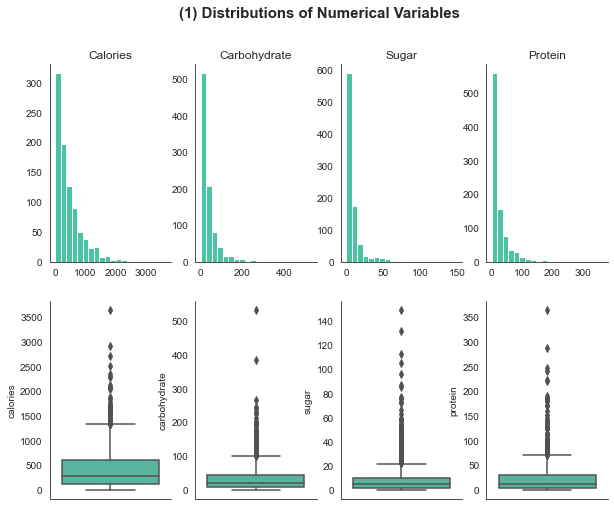

In [16]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, ax = plt.subplots(2, 4, figsize=(10,8))
for i, nut in enumerate(num_cols):
    ax[0, i].hist(df[nut], bins=20, color=color)
    ax[0, i].set_ itle(nut.title())
    ax[0, i].spines[['top', 'right']].set_visible(False)
    
for i, nut in enumerate(num_cols):
    sns.boxplot(y=df[nut], ax=ax[1, i], color=color)
    ax[1, i].spines[['top', 'right']].set_visible(False)

fig.suptitle("(1) Distributions of Numerical Variables", fontweight='bold', fontsize=15)
plt.show()

## How many recipes are there from each category?

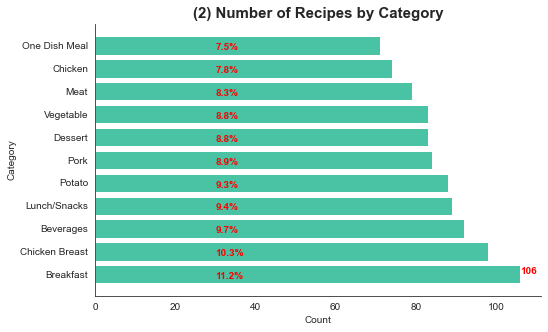

In [17]:
rep_by_cat = df.groupby('category').size().sort_values(ascending=False)
display_barh(rep_by_cat.index, rep_by_cat, 'Count','Category', '(2) Number of Recipes by Category')
per_rep_by_cat = round(rep_by_cat / rep_by_cat.sum() * 100, 1)
plt.text(rep_by_cat[0], 0, str(rep_by_cat[0]) , color='red', fontweight='bold')
for i, val in enumerate(rep_by_cat):
    plt.text(30, i-0.2, str(per_rep_by_cat[i]) + "%" , color='red', fontweight='bold')

plt.show()

## Number of recipes by site traffic

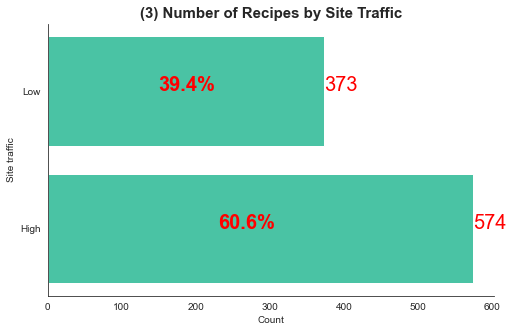

In [18]:
rep_by_traffic = df.groupby('high_traffic').size().sort_values(ascending=False)
display_barh(rep_by_traffic.index, rep_by_traffic, 'Count', 'Site traffic', '(3) Number of Recipes by Site Traffic')

percentage_rep_by_traffic = round(rep_by_traffic / rep_by_traffic.sum() * 100, 1)
for i, val_per in enumerate(zip(rep_by_traffic, percentage_rep_by_traffic)):
    val, percent =val_per
    plt.text(val, i, str(val) , color='red', fontsize=20)
    plt.text(val/2.5, i, str(percent) + '%', color='red', fontweight='bold', fontsize=20)



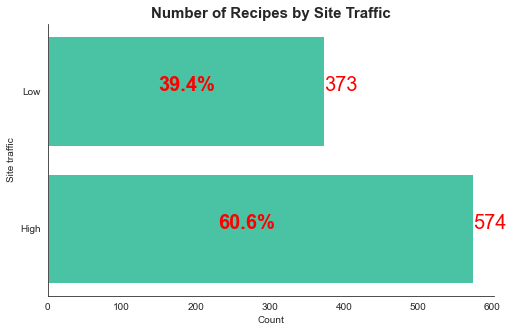

In [19]:
rep_by_traffic = df.groupby('high_traffic').size().sort_values(ascending=False)
display_barh(rep_by_traffic.index, rep_by_traffic, 'Count', 'Site traffic', 'Number of Recipes by Site Traffic')

percentage_rep_by_traffic = round(rep_by_traffic / rep_by_traffic.sum() * 100, 1)
for i, val_per in enumerate(zip(rep_by_traffic, percentage_rep_by_traffic)):
    val, percent =val_per
    plt.text(val, i, str(val) , color='red', fontsize=20)
    plt.text(val/2.5, i, str(percent) + '%', color='red', fontweight='bold', fontsize=20)
    
plt.savefig("target.png", bbox_inches='tight')

## What is the average amount of each nutrient and calories from each category?

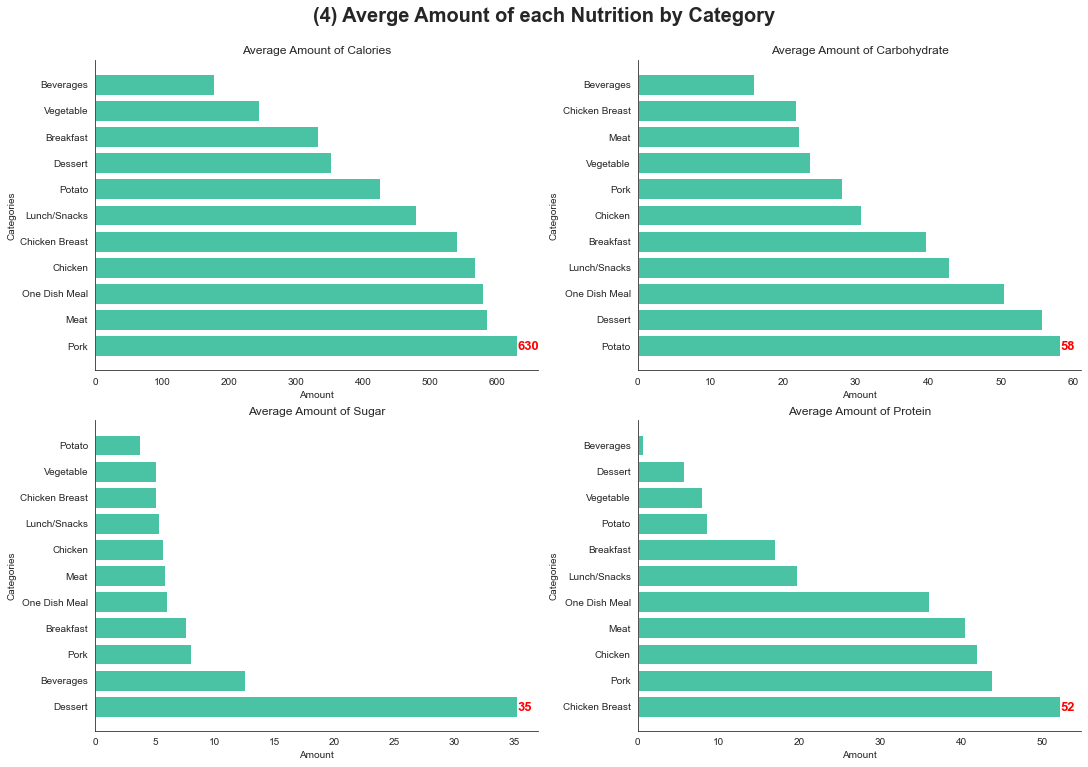

In [20]:
ave_nutrient = df.groupby("category")[['calories', 'carbohydrate', 'sugar', 'protein']].mean()
fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(ave_nutrient.columns):
    ave_nut = ave_nutrient[col].sort_values(ascending=False)
    r, c = i // 2, i % 2
    display_ax_barh(ax[r,c], ave_nut.index, ave_nut, 'Amount', 'Categories', f'Average Amount of {col.title()}')
    ax[r, c].text(ave_nut[0], -0.15, f"{ave_nut[0]:.0f}", color='red', fontweight='bold', fontsize=13) 
        
    
fig.suptitle("(4) Averge Amount of each Nutrition by Category", fontweight='bold', fontsize=20, y=1.05)
plt.show()

## What is the difference in site traffic between categories?

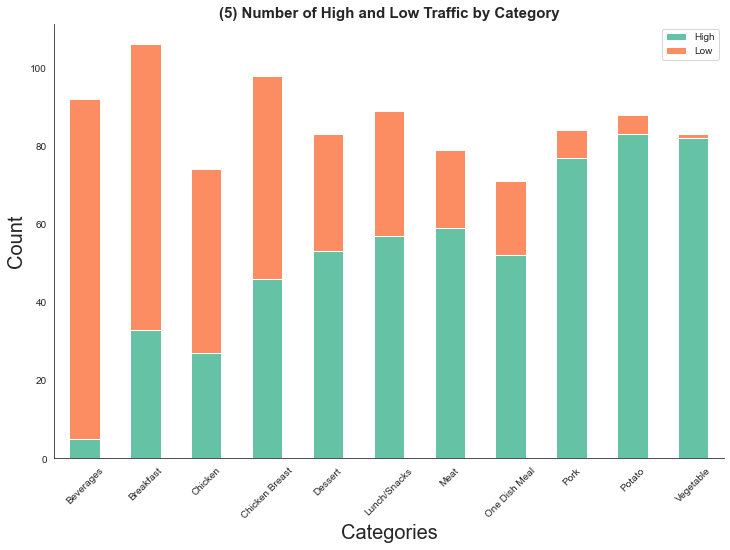

In [21]:
traffic_by_cat = pd.pivot_table(df, index='category', columns='high_traffic', values='servings' , aggfunc='count', fill_value=0)
traffic_by_cat.plot(kind='bar', stacked=True, figsize=(12,8))
plt.legend(loc=0)
plt.xlabel("Categories", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("(5) Number of High and Low Traffic by Category", fontweight='bold', fontsize=15)
plt.tick_params('x', rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Which category has the largest total number of servings?

In [22]:
df.groupby('high_traffic').calories.sum()

high_traffic
High    248007.38
Low     142158.20
Name: calories, dtype: float64

Text(344, -0.3, '342')

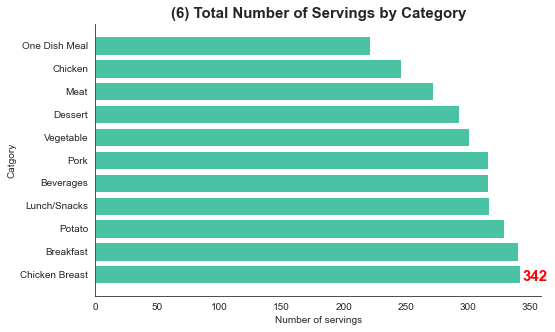

In [23]:
servings_by_cat = df.groupby("category").servings.sum().sort_values(ascending=False)
display_barh(servings_by_cat.index, servings_by_cat, "Number of servings", "Catgory", "(6) Total Number of Servings by Category")

plt.text(servings_by_cat[0] + 2, -0.3, str(servings_by_cat[0]), color='red', fontweight='bold', fontsize=15)

## Is there any relationship between nutrients (carbohydrate, sugar, protein) with each other, and with calories?

Looks like there is no relationship between those numerical variables.

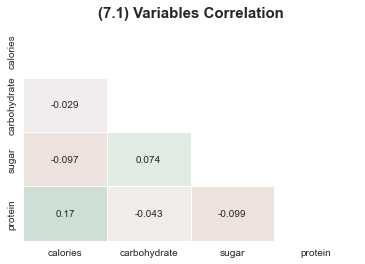

In [24]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

df_corr = df[num_cols].corr()
mask_triu_map = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(20, 145, as_cmap=True)
sns.heatmap(df_corr, mask=mask_triu_map, vmin=-1, vmax=1, cmap=cmap, annot=True, cbar=False, linewidth=1)
plt.title("(7.1) Variables Correlation", fontweight='bold', fontsize=15)
plt.show()

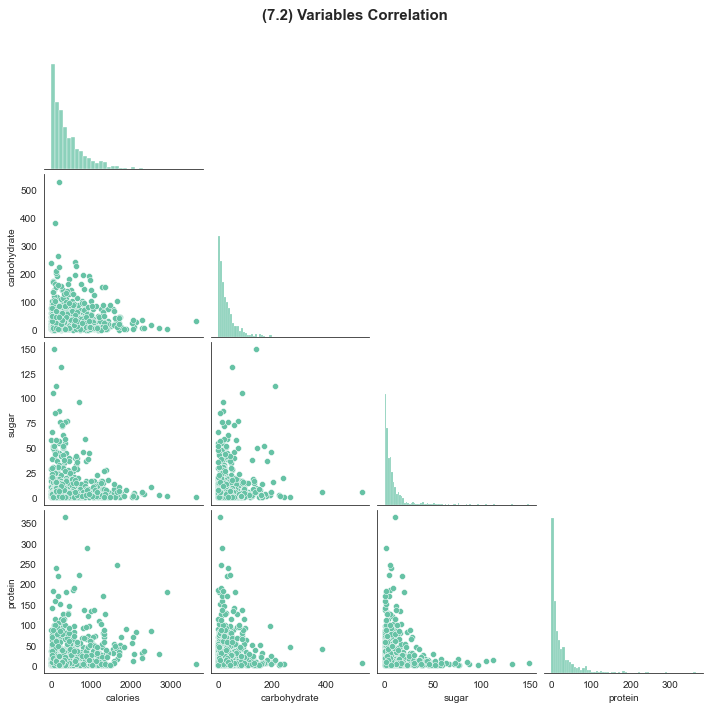

In [25]:
g = sns.pairplot(df[num_cols], corner=True)
g.fig.suptitle("(7.2) Variables Correlation", fontweight='bold', fontsize=15)
plt.show()


# Data Preprocessing

- Deal with missing values
- Check outliers
- Create new features
- Get dummy variables
- Scale features

## Dealing with missing values

In [26]:
df[df.isna().any(axis=1)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
23,NaN,NaN,NaN,NaN,Meat,2,Low
48,NaN,NaN,NaN,NaN,Chicken Breast,4,Low
82,NaN,NaN,NaN,NaN,Meat,4,High
89,NaN,NaN,NaN,NaN,Pork,6,High
116,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,NaN,NaN,NaN,NaN,Dessert,2,High
136,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,NaN,NaN,NaN,NaN,Potato,2,High
187,NaN,NaN,NaN,NaN,Pork,4,High


- The first solution: the four columns 'calories', 'sugar', 'protein', and 'carbohydrate' all have right-skewed distributions, so I'll replace NaN values in each column with its median value grouped by "category" column.
- The second solution: drop all rows containing NaN in all those four colums

**In this case, I find out removing all NaN values will improve the model performance.**


In [27]:
# replace NaN values in each column with its median value grouped by "category" column.
# num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
# for col in num_cols:
    df[col] = df.groupby('category')[col].transform(lambda x: x.fillna(x.median()))

In [28]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
df.dropna(subset=num_cols, inplace=True)

## Dealing with outliers

In [29]:
df[num_cols].skew().to_frame('skew')

,skew
calories,2.036151
carbohydrate,3.756980
sugar,4.223352
protein,3.509453


- Using **skew()** function we can see that four columns **'calories', 'carbohydrate', 'sugar',** and **'protein'** are highly right-skewed.
- On the boxplots above, there are many outliers on those columns, and those outliers are pretty far away from the upper intequartiles. In this case, I've decided to replace outliers with the upper limit intequartiles of each column.

#### Checking 'mean', 'median', '25th' and '75' percentiles of four variables **'calories', 'carbohydrate', 'sugar',** and **'protein'** grouped by **'category'**

In [30]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
per1, per2 = 25, 75
for col in num_cols:
    q1, q2 = np.percentile(df[col], [per1, per2])
    print(f"The {per1}th and {per2}th of '{col}' are respectively {q1}, {q2}")

The 25th and 75th of 'calories' are respectively 110.43, 597.65
The 25th and 75th of 'carbohydrate' are respectively 8.375, 44.965
The 25th and 75th of 'sugar' are respectively 1.69, 9.8
The 25th and 75th of 'protein' are respectively 3.1950000000000003, 30.200000000000003


In [31]:
def percentile(n):
    def percentile_(col):
        return np.percentile(col, n)
    percentile_.__name__ = f"percentile_{n}"
    return percentile_

In [32]:
print("Mean, 25th, 50th, and 75th percentiles by 'category': ")
df.groupby('category')[num_cols].agg(['mean', percentile(25), 'median', percentile(75)])

Mean, 25th, 50th, and 75th percentiles by 'category': 


calories                                      carbohydrate  \
                      mean percentile_25   median percentile_75         mean   
category                                                                       
Beverages       177.732174       63.6475  126.455      269.1075    15.955978   
Breakfast       331.880000       64.6400  229.380      497.2350    39.711698   
Chicken         566.732029      248.2800  379.870      642.7100    30.751304   
Chicken Breast  540.338511      182.6425  371.335      769.8175    21.833191   
Dessert         351.402078      110.1700  288.550      561.7200    55.661818   
Lunch/Snacks    478.848537      112.8450  369.505      732.0725    42.820976   
Meat            584.533784      174.9550  460.870      812.6175    22.159595   
One Dish Meal   579.090000      186.8100  419.280      832.8600    50.383433   
Pork            629.708082      144.2800  399.260      951.7400    28.076164   
Potato          425.068554      139.6450  269.460      611.0000    58.150361   
Vegetable       245.014872       62.8575  124.305      329.4200    23.679359   

                                                        sugar                \
               percentile_25  median percentile_75       mean percentile_25   
category                                                                      
Beverages             3.4550  11.250       21.0275  12.537283        3.1275   
Breakfast            11.8600  28.420       51.5250   7.552264        2.1800   
Chicken               7.9300  18.110       38.0900   5.678261        1.2000   
Chicken Breast        7.3400  13.475       33.6150   5.098723        1.3750   
Dessert              17.7200  38.550       73.1600  35.228442        8.1200   
Lunch/Snacks         11.0450  31.985       63.3300   5.309146        1.4575   
Meat                  6.4725  19.115       31.4175   5.813649        1.5150   
One Dish Meal        11.2650  25.430       79.5600   6.011642        1.6550   
Pork                  7.5200  19.560       42.5300   8.040137        1.8900   
Potato               16.3150  32.540       61.8050   3.718916        1.2250   
Vegetable             5.6100  13.335       36.6100   5.065128        1.5900   

                                        protein                        \
                median percentile_75       mean percentile_25  median   
category                                                                
Beverages        8.075       15.9575   0.594783        0.1475   0.410   
Breakfast        4.830       10.7925  16.957170        5.8400  11.685   
Chicken          3.170        8.5400  41.843913       10.5500  32.980   
Chicken Breast   3.645        6.5150  52.161383       15.9550  37.770   
Dessert         24.650       50.8100   5.759870        2.4900   4.810   
Lunch/Snacks     2.750        6.5825  19.610976        6.4550  12.965   
Meat             3.385        8.1775  40.377027       14.9225  28.530   
One Dish Meal    4.040        7.8450  35.926418       10.1350  28.480   
Pork             5.230        9.4000  43.797671       13.8700  29.820   
Potato           2.640        5.2500   8.574217        2.9600   5.900   
Vegetable        3.700        6.1950   7.891923        1.7850   4.835   

                              
               percentile_75  
category                      
Beverages             0.8950  
Breakfast            23.1925  
Chicken              56.1900  
Chicken Breast       76.6625  
Dessert               7.7100  
Lunch/Snacks         23.8375  
Meat                 53.0175  
One Dish Meal        49.3350  
Pork                 52.0000  
Potato                9.6850  
Vegetable            10.7875

#### Checking lower and upper limits of four variables **'calories', 'carbohydrate', 'sugar',** and **'protein'**

In [33]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
for col in num_cols:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    print(f"Lower and Upper limits of '{col}' are respectively {lower} and {upper}")

Lower and Upper limits of 'calories' are respectively -620.3999999999999 and 1328.48
Lower and Upper limits of 'carbohydrate' are respectively -46.510000000000005 and 99.85000000000001
Lower and Upper limits of 'sugar' are respectively -10.475000000000003 and 21.965000000000003
Lower and Upper limits of 'protein' are respectively -37.31250000000001 and 70.70750000000001


In [34]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
for col in num_cols:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    n = len(df.loc[df[col] > upper])
    print(f"There are {n} values which are greater than the upper limit in '{col}'")

There are 47 values which are greater than the upper limit in 'calories'
There are 58 values which are greater than the upper limit in 'carbohydrate'
There are 79 values which are greater than the upper limit in 'sugar'
There are 77 values which are greater than the upper limit in 'protein'


In [35]:
def upper_limit(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    return upper


In [36]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
upper_limit = df.groupby('category')[num_cols].agg(upper_limit)
print("The upper limits by 'category': ")
upper_limit

The upper limits by 'category': 


,calories,carbohydrate,sugar,protein
category,,,,
Beverages,577.29750,47.38625,35.20250,2.01625
Breakfast,1146.12750,111.02250,23.71125,49.22125
Chicken,1234.35500,83.33000,19.55000,124.65000
Chicken Breast,1650.58000,73.02750,14.22500,167.72375
Dessert,1239.04500,156.32000,114.84500,15.54000
Lunch/Snacks,1660.91375,141.75750,14.27000,49.91125
Meat,1769.11125,68.83500,18.17125,110.16000
One Dish Meal,1801.93500,182.00250,17.13000,108.13500
Pork,2162.93000,95.04500,20.66500,109.19500


- The lower limits of those variables are all negative values, which makes no sense so the upper limits are all we care about.
- As we can see, the average upper limit values are way different from the upper limits of each category.
- I suggest replacing the values which are greater than the upper limits of each category with the categories' upper limit.

### Deal with extremely high outliers

Using **iterrows()** method to replace outliers with the appropriate values in the above table.

In [37]:
num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
for col in num_cols:
    upper_limit_dict = upper_limit[col].to_dict()
    for ind, row in df.iterrows():
        category = row['category']
        upper_value = upper_limit_dict[category]
        if category in upper_limit_dict and row[col] > upper_value:
            df.loc[ind, col] = upper_value

### Deal with low values in 'calories' colum
 
- There are many low calorie values while the value of 'carbohydrate', 'sugar', and 'protein' are pretty high. This doesn't make sense.
- According to **Food and Nutrition Information Center (FNIC)**, **carbohydrate**, **sugar**, and **protein** provide **4 calories per gram** for each nutrition.
- So, I'll calculate theorical calories based on 'carbohydrate', 'sugar', 'protein' columns, and compare to the true calories in the dataset.
- There are 362 "unreasonably low" calorie values based on my assumption. We can do either of the following two ways:
    - Replace the calorie values with the theorical values if the observed values are less than the theorical values. This way could make the data biased since there are so many of them.
    - Or, we can just leave them as they are.
   
- And as I expected, when I run the model for those two cases, the model gets good accuracy when I just leave all the low values alone. 

In [38]:
theor_calories = 4 * (df.carbohydrate + df.sugar + df.protein)
n = df.loc[df.calories < theor_calories].shape[0]
print(f"There are {n} rows that have observed calories less than the theorical calorie value.")

There are 362 rows that have observed calories less than the theorical calorie value.


In [39]:
# df.loc[df.calories < theor_calories, 'calories'] = theor_calories

In [40]:
# num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
# fig, ax = plt.subplots(2, 4, figsize=(10,8))
# for i, nut in enumerate(num_cols):
#     ax[0, i].hist(df[nut], bins=20, color=color)
#     ax[0, i].set_title(nut.title())
#     ax[0, i].spines[['top', 'right']].set_visible(False)
    
# for i, nut in enumerate(num_cols):
#     sns.boxplot(y=df[nut], ax=ax[1, i], color=color)
#     ax[1, i].spines[['top', 'right']].set_visible(False)

In [41]:
# num_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
# for col in num_cols:
#     Q1, Q3 = np.percentile(df[col], [25, 75])
#     IQR = Q3 - Q1
#     lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
#     df.loc[df[col] > upper, col] = upper
#     df.loc[df[col] < lower, col] = lower


## Feature engineering, get dummies, split data, and scale data

In [42]:
#Create 'total_nutrition' column which is the sum of three columns 'carbohydrate', 'sugar', 'protein'
df['total_nutrition'] = df.carbohydrate + df.sugar + df.protein

#Create 'calories_per_serving' column by dividing 'calories' by 'servings'
df['calories_per_serving'] = df['calories'] / df['servings']


In [43]:
#Convert 'high_traffic' to a binary feature
#Assign value 1 to "High", 0 to "Low"
df.high_traffic = df.high_traffic.map({"High":1, "Low":0})

In [44]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,total_nutrition,calories_per_serving
1,35.48,38.56,0.6600,0.92,Potato,4,1,40.1400,8.8700
2,914.28,42.68,3.0900,2.88,Breakfast,1,0,48.6500,914.2800
3,97.03,30.56,35.2025,0.02,Beverages,4,1,65.7825,24.2575
4,27.05,1.85,0.8000,0.53,Beverages,4,0,3.1800,6.7625
5,691.15,3.46,1.6500,53.93,One Dish Meal,2,1,59.0400,345.5750


In [45]:
df['calories_per_serving_cat'] = df.calories_per_serving.apply(lambda x: 0 if x < 100 else(1 if x < 400 else 2))


In [46]:
#Create a column representing categories of food calories per serving
# less than 100 calories is considered low
# 101-400 calories is considered medium
# greater than 400 calories is considered high
df['cal_per_ser_cat'] = pd.cut(df.calories_per_serving, bins=[0, 100, 400, np.inf], labels=['low', 'medium', 'high'])
df.cal_per_ser_cat.value_counts()

low       465
medium    327
high      103
Name: cal_per_ser_cat, dtype: int64

In [47]:
#Get dummy variable
clean_df = df.copy()
df_dummies = pd.get_dummies(clean_df, columns=['category', 'cal_per_ser_cat',])


In [48]:
#Split the data
X = df_dummies.drop(columns='high_traffic').values
y = df_dummies['high_traffic'].values


In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)


In [51]:
pd.Series(y_train).value_counts(normalize=True)

1    0.602086
0    0.397914
dtype: float64

In [52]:
#Scale the data
features = ['calories', 'carbohydrate', 'sugar', 'protein', 'calories_per_serving']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()
# X_train_scaled[features] = scaler.fit_transform(X_train[features])
# X_test_scaled[features] = scaler.transform(X_test[features])

In [53]:
# X_train.var()

In [54]:
# pd.DataFrame(X_train_scaled, columns= df_dummies.drop(columns='high_traffic').columns).var()

# Model Building

Since this is a classification problem, I'll try various different following models with default parameters using 10-fold cross-validation. Here what I got:  


|Model|Train Accuracy|Test Accuracy|Precision Score|Recall Score|AUC|10-Fold Accuracy|
|----|----------|-------------|---------------|------------|---|----------------|
|K Nearest Neighbors|0.822653|0.696429|0.729927|0.763359|0.756587|0.764552|
|Logistic Regression|0.789866|0.687500|0.732824|0.732824|0.783140|0.774934|
|Decision Tree|1.000000|0.651786|0.699248|0.709924|0.639908|0.658626|
|Random Forest|1.000000|0.665179|0.681818|0.801527|0.759583|0.754104|
|Support Vector Machine|0.807750|0.696429|0.717241|0.793893|0.740294|0.794315|
|XGBoost|1.000000|0.651786|0.675497|0.778626|0.710827|0.724210|

- We can see that **Logistic Regression, K Nearest Neighbors,** and **Support Vector Machine** have better performance because they provide high accuracy and less overfitting than other models based on **AUC score** and **Accuracy score using 10-Fold Cross-Validation**.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

In [56]:
# precision = precision_score(y_test, y_pred)
# print("Precision score on test set: ", precision)
# recall = recall_score(y_test, y_pred)
# print("Recall score on test set: ", recall) 

In [57]:
def classifier_performance(model, model_name):
    print("Classifier: ", model_name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    train_score = model.score(X_train_scaled, y_train)
    print("Accuracy on training set: ", train_score)
    test_score = model.score(X_test_scaled, y_test)
    print("Accuracy on test set: ", test_score)
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
    
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("ROC/AUC score on test set: ", auc_score)
    ave_cross = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10,  scoring='accuracy'))
    print("Average accuracy score by 10-fold cross-validation on training set: ", ave_cross)
    print("---------------------------------------------------")
    
    return [train_score, test_score, auc_score, ave_cross]

In [58]:
cls = [(KNeighborsClassifier(), "K Nearest Neighbors"),
       (LogisticRegression(), "Logistic Regression"),
       (DecisionTreeClassifier(), "Decision Tree"),
       (RandomForestClassifier(), "Random Forest"),
       (SVC(probability=True), "Support Vector Machine"),
       (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), "XGBoost")]
      
scores = {}
for model, model_name in cls:    
    scores[model_name] = classifier_performance(model, model_name)

Classifier:  K Nearest Neighbors
Accuracy on training set:  0.8062593144560357
Accuracy on test set:  0.6964285714285714
Confusion matrix: 
 [[ 55  38]
 [ 30 101]]
ROC/AUC score on test set:  0.760732167774768
Average accuracy score by 10-fold cross-validation on training set:  0.764486391571554
---------------------------------------------------
Classifier:  Logistic Regression
Accuracy on training set:  0.7868852459016393
Accuracy on test set:  0.6875
Confusion matrix: 
 [[58 35]
 [35 96]]
ROC/AUC score on test set:  0.7827300336534516
Average accuracy score by 10-fold cross-validation on training set:  0.782396839332748
---------------------------------------------------
Classifier:  Decision Tree
Accuracy on training set:  1.0
Accuracy on test set:  0.6428571428571429
Confusion matrix: 
 [[48 45]
 [35 96]]
ROC/AUC score on test set:  0.6244767298694902
Average accuracy score by 10-fold cross-validation on training set:  0.6646180860403863
-------------------------------------------

,Train Accuracy,Test Accuracy,AUC,10-Fold Accuracy
Support Vector Machine,0.806259,0.700893,0.730937,0.798793
Logistic Regression,0.786885,0.687500,0.782730,0.782397
K Nearest Neighbors,0.806259,0.696429,0.760732,0.764486
Random Forest,1.000000,0.687500,0.767873,0.748090
XGBoost,1.000000,0.669643,0.711155,0.706321
Decision Tree,1.000000,0.642857,0.624477,0.664618


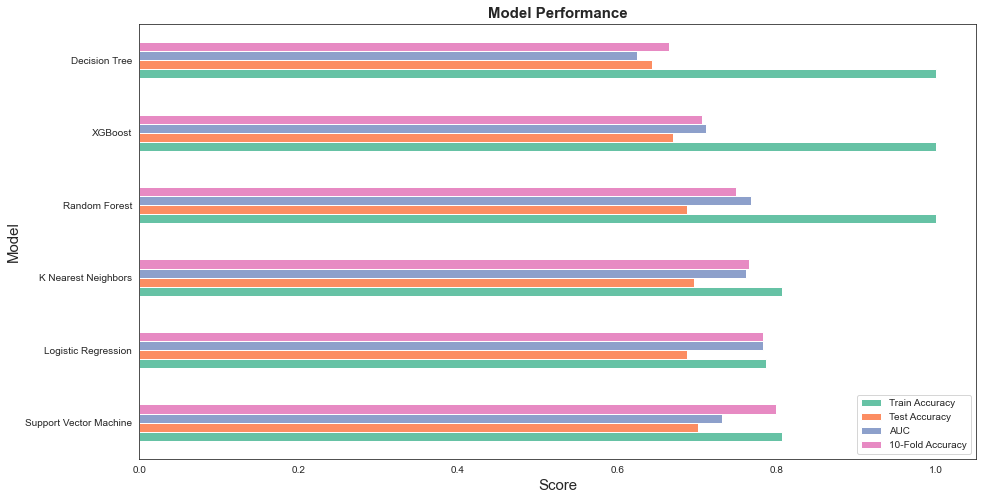

In [59]:
performance = pd.DataFrame.from_dict(scores, orient='index', columns=['Train Accuracy', 'Test Accuracy', 'AUC', '10-Fold Accuracy'])
performance = performance.sort_values('10-Fold Accuracy', ascending=False)
display(performance)
performance.plot(kind='barh', figsize=(15,8))
plt.xlabel("Score", fontsize=15)
plt.ylabel("Model", fontsize=15)
plt.title("Model Performance", fontweight='bold', fontsize=15)
plt.legend(loc='best')
# plt.savefig('baseline.png', bbox_inches='tight')
plt.show()

- We can see in this graph that **Logistic Regression, K Nearest Neighbors,** and **Support Vector Machine** have better performance.

## Hyperparameter Tuning
- After getting the baselines, I use GridSeachCV and RandomizedSearchCV with 10-fold cross-validation for the three best models above to improve each model's result.

|Model|Baseline Accuracy |Tuned Accuracy| Tuned AUC|
|----|-------|----|----|
|K Nearest Neighbors|0.764552|0.783867|0.781253|
|Logistic Regression|0.774934 |0.779434|0.773783|
|Support Vector Machine|0.794315 | 0.800263|0.725601|

- Although SVC model has the least AUC score, we have reasonably balanced data (60% High and 40% Low in target variable) so Accuracy score is more appropriate  in this case.

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
def tuned_performance(model, model_name):
    print("Classifier: ", model_name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print('ROC/AUC score on test set: ', auc)
    ave_cross = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10))
    print("Average accuracy score using 10-fold cross-validation", ave_cross)
    
    return [ave_cross, auc]

In [62]:
tuned_scores = {}

#### Best KNN

In [63]:
params = {'n_neighbors': list(range(1, 30)),
          'leaf_size': list(range(1, 50)),
          'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_distributions=params, cv=10 )
knn_result = knn_cv.fit(X_train_scaled, y_train)
print('Best score: ', knn_result.best_score_)
print('Best parameters: ', knn_result.best_params_)


Best score:  0.7794117647058824
Best parameters:  {'p': 2, 'n_neighbors': 25, 'leaf_size': 43}


In [64]:
# best_knn = knn_result.best_estimator_
# classifier_performance(KNeighborsClassifier(leaf_size=27, n_neighbors=28, p=1), "Best KNN")

In [65]:
best_knn = knn_result.best_estimator_
tuned_scores['Best KNN'] = tuned_performance(best_knn, 'Best K Nearest Neighbors')

Classifier:  Best K Nearest Neighbors
ROC/AUC score on test set:  0.7883115817122219
Average accuracy score using 10-fold cross-validation 0.7794117647058824


#### Best Logistic Regression

In [66]:
params = {'max_iter': [1000],
          'penalty': ['l2'],
          'solver': ['lbfgs', 'liblinear', 'newton-cg'],
          'tol': [0.0001, 0.001],
         'C': [0.01, 0.1, 1.0, 10.0]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid=params, cv=10 )
logreg_result = logreg_cv.fit(X_train_scaled, y_train)
print('Best score: ', logreg_result.best_score_)
print('Best parameters: ', logreg_result.best_params_)

# 0.7718309859154929
# {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

Best score:  0.7838893766461809
Best parameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}


In [67]:
best_logreg = logreg_result.best_estimator_
tuned_scores['Best logreg'] = tuned_performance(best_logreg, 'Best Logistic Regression')

Classifier:  Best Logistic Regression
ROC/AUC score on test set:  0.7726339981942051
Average accuracy score using 10-fold cross-validation 0.7838893766461809


##### Best SVC

In [68]:
params = {'C': [0.1, 1, 10, 100], 
          'gamma': [1, 0.1, 0.01, 0.001],
          'kernel': ['rbf'],} 
svc = SVC(probability=True)
svc_cv = GridSearchCV(svc, param_grid=params, cv=10 )
svc_result = svc_cv.fit(X_train_scaled, y_train)
print('Best score: ', svc_result.best_score_)
print('Best parameters: ', svc_result.best_params_)

Best score:  0.8032484635645304
Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [69]:
best_svc = svc_result.best_estimator_
tuned_scores['Best SVC'] = tuned_performance(best_svc, 'Best SVC')

Classifier:  Best SVC
ROC/AUC score on test set:  0.7379955675941885
Average accuracy score using 10-fold cross-validation 0.8032484635645304


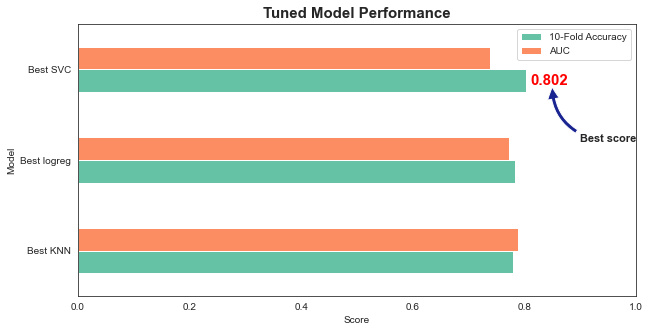

In [70]:
tuned_scores_df = pd.DataFrame.from_dict(tuned_scores, orient='index', columns=['10-Fold Accuracy', 'AUC'])
tuned_scores_df.sort_values('10-Fold Accuracy').plot(kind='barh', figsize=(10,5), xlim=(0,1))

plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Tuned Model Performance", fontweight='bold', fontsize=15)
plt.legend(loc='best')

plt.text(0.81, 1.83, "0.802", fontweight='bold', fontsize=15, color='red')
plt.annotate("Best score", xy=(0.85, 1.82), xytext=(0.9, 1.2),
             fontweight="bold", fontsize=11,
             arrowprops={'facecolor':'#192490',
                        'shrink':0.025,
                        'connectionstyle':'arc3, rad=-0.3'})
# plt.savefig('Tuned.png', bbox_inches='tight')
plt.show()


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation